In [97]:
### Survived is dependent variable  .Build the Logistic Regression model which gives the accuracy score of

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [99]:
df=pd.read_csv("titanic-training-data.csv",sep=",")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
df.shape

(891, 12)

In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df.describe(include="all") #null value detection

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Johansson, Mr. Karl Johan",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [105]:
df.isnull().sum() #Columns Age and Cabin,Embarked  have the null value 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Univariate Analysis  and Bivariate analysis
### (column wise  to check the factor which lead to sucess -socio-economic status )

<AxesSubplot:xlabel='Survived', ylabel='count'>

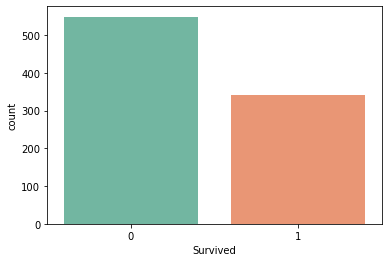

In [106]:
sns.countplot(x="Survived",data=df,palette="Set2")


<AxesSubplot:xlabel='Pclass', ylabel='count'>

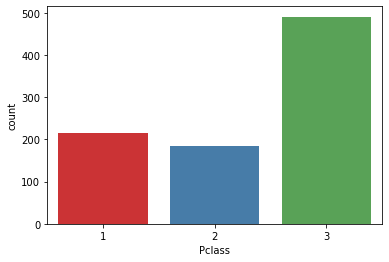

In [107]:
sns.countplot(x="Pclass",data=df,palette="Set1")

<AxesSubplot:xlabel='Sex', ylabel='count'>

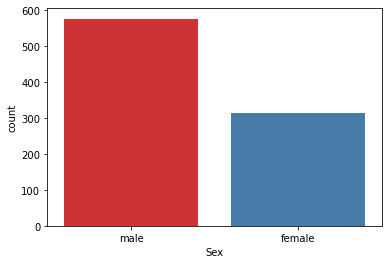

In [108]:
sns.countplot(x="Sex",data=df,palette="Set1")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

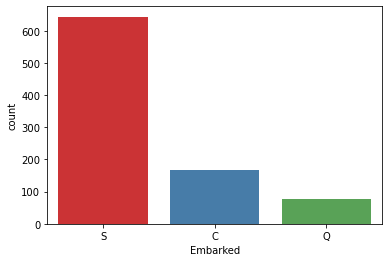

In [109]:
sns.countplot(x="Embarked",data=df,palette="Set1")

In [110]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Survived', ylabel='Density'>

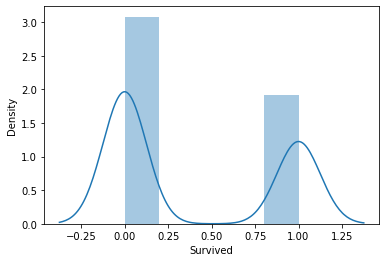

In [111]:
sns.distplot(df["Survived"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

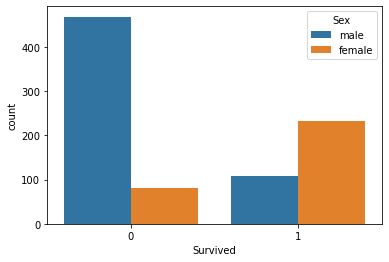

In [112]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

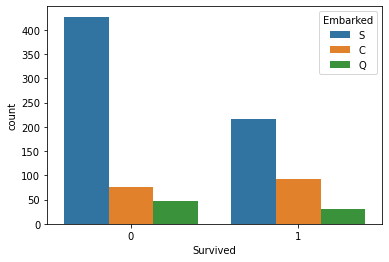

In [113]:
sns.countplot(x="Survived",hue="Embarked",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

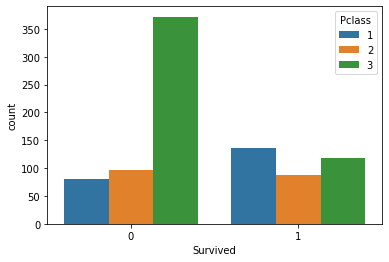

In [114]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

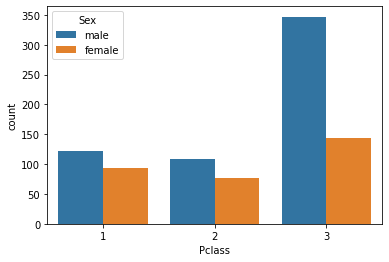

In [115]:
sns.countplot(x="Pclass",hue="Sex",data=df)

### multivariate analysis 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

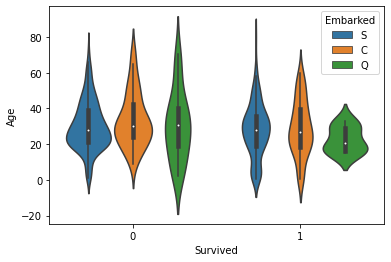

In [116]:
sns.violinplot(x="Survived",y="Age",hue="Embarked",data=df)

###  Drop unwanted columns

In [117]:
df=df.drop(columns=["PassengerId","Fare","Ticket","Name","Cabin"],axis=1)

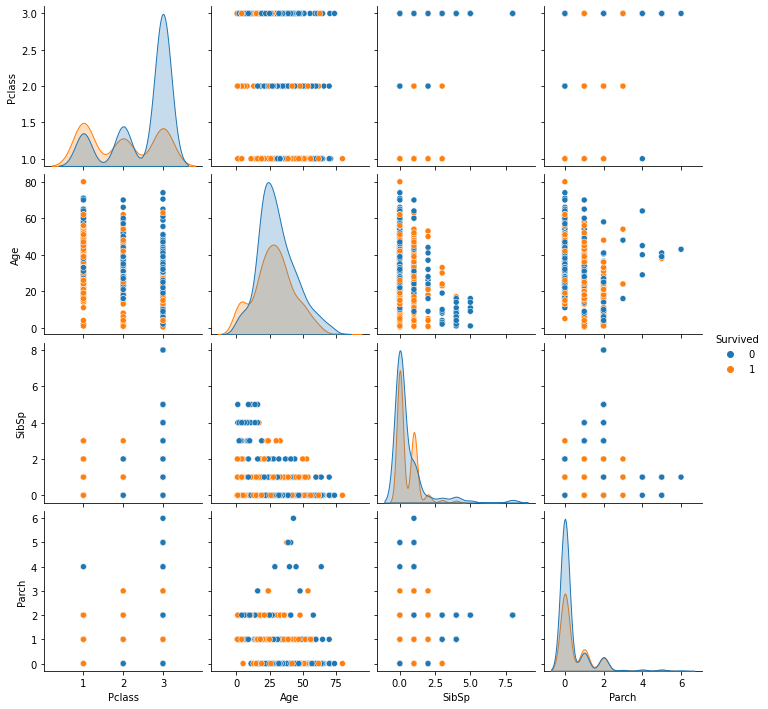

In [118]:
sns.pairplot(df,hue="Survived")

### Missing value treatment 

In [119]:
median1=df["Age"].median()
df["Age"]=df["Age"].fillna(median1)

In [120]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [121]:
mode1=df["Embarked"].mode()[0]
df["Embarked"]=df["Embarked"].fillna(mode1) # mode for categorical data

In [122]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

### Creating Dummies

In [123]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [124]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

### Building the model 

In [125]:
X=df.drop(["Survived"],axis=1)

In [126]:
y=df[['Survived']]

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Fitting the model in Logistic Regression (As Survived Dependent variable is categorical value)

In [128]:
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
model

LogisticRegression()

In [129]:
prediction=model.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8097014925373134

In [131]:
from sklearn import metrics

In [132]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[136,  21],
       [ 30,  81]], dtype=int64)

<AxesSubplot:>

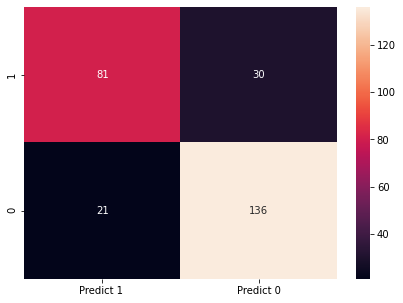

In [134]:
cm=metrics.confusion_matrix(y_test,prediction,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                     columns=[i for i in ["Predict 1 ","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [140]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy_score(y_test,prediction)

0.8097014925373134